# Bass Model Analysis of E-reader adoption
Homework 1  
Marieta Khachatryan  
DS223 - Marketing Analytics

Every year, TIME Magazine publishes a list of the top 100 innovations. For this homework I have decided to analyze the diffusion of **color e-readers**, particularly the Kobo Libra Colour. The product represents a new stage in digital reading technology, moving from black and white displays to color e-ink, improving user experience for illustrated contnet.  
The purpose of this homework is to understand how similar innovations have been adopted in the past and to predict the likely diffusion path. 

The first major e-reader innovation was Amazon Kindle that was launched in 2007.  
Like the Kobo Libra Colour, it introduced a portable, paper-like digital reading tool but was limited to monochrome displays. Both products target the same purpose enhancing reading convenience through digital formats.  
While the Kindle established the digital reading market, the Libra Colour builds on that foundation by improving technology (color display, faster refresh rates) and broadening appeal to new user groups, such as students and visual readers.  
Thus, Kindle adoption trends provide a suitable reference for modeling the expected diffusion of the Kobo Libra Colour.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [44]:
data = pd.read_excel("data/ereaders_users_clean.xlsx")

In [45]:
print(data.head())

   Year  Users_mil
0  2017     690.19
1  2018     761.45
2  2019     821.01
3  2020     859.34
4  2021     942.90


Historical data on global eBook users was used from Statista. The data represented the number of users measured in millions that use eBooks globally from 2017 up to 2030, but to have a proper analysis based on observed data only, I decided to exclude the observations from 2025 to 2030.  
However, since the data described above is a little general and doesn't only focus on Amazon, another data was also included to show supplementary information about the e-readers purchases by store brand as of December 2024. Even though it is US based and may raise questions like How is it relevant, it does show a little more insight that Amazon is indeed the dominant in this sector. 

In [46]:
brands_24 = pd.read_excel("data/PurchasePerc_2024_bybrand.xlsx")

In [47]:
print(brands_24.head())

               Brand  Purchase (%)
0             Amazon            79
1     Barnes & Noble            29
2            Walmart            29
3         eBooks.com            28
4  Google Play Store            27


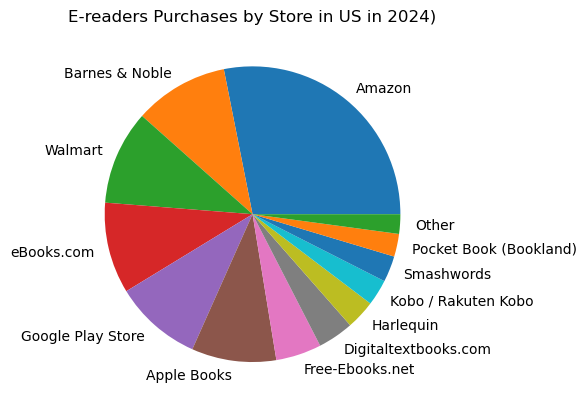

In [48]:
plt.pie(brands_24['Purchase (%)'], labels=brands_24['Brand'])
plt.title("E-readers Purchases by Store in US in 2024)")
plt.show()

The pie chart above illustrates the share of e-reader purchases by store brand as already stated above. It shows that Amazon holds the largest share of the market, while Kobo ranks much lower, placing near the bottom among other brands.  
This highlights Amazon's clear dominance through its Kindle product line.This uneven distribution of market share reflects strong brand loyalty and ecosystem effects that influence adoption patterns.

In [49]:
past_data = data.iloc[:8]

In [50]:
t = np.arange(len(past_data) + 1)
sales = past_data["Users_mil"].values

The Bass Model describes how new products are adopted over time, dividing consumers into two main types:  
- Innovators: users who adopt due to their interest or marketing influence
- Imitators: users who adopt based on reviews, word-of-mouht or social media

In [51]:
def bass_f(t, p, q, M):
    return M * (((p + q)**2 / p) * np.exp(-(p + q) * t)) / ((1 + (q / p) * np.exp(-(p + q) * t))**2)

In [57]:
t = np.arange(1, len(sales) + 1)
print(len(t), len(sales))

8 8


In [58]:
initial_guess = [0.01, 0.3, sum(sales) * 2]
popt, _ = curve_fit(bass_f, t, sales, p0=initial_guess, maxfev=10000)
p, q, M = popt
print(f"Estimated parameters are: \np = {p:.4f}, q = {q:.4f}, M = {M:.2f}")

Estimated parameters are: 
p = 0.0278, q = 0.1181, M = 23055.45


In [59]:
t_future = np.arange(1, len(data) + 6) 
predicted_sales = bass_f(t_future, p, q, M)

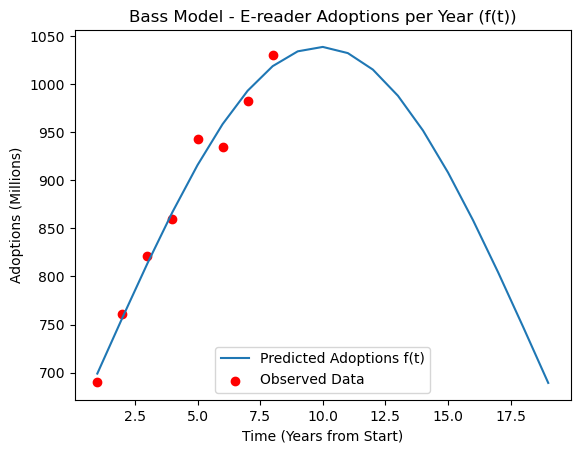

In [60]:
plt.plot(t_future, predicted_sales, label='Predicted Adoptions f(t)')
plt.scatter(t, sales, color='red', label='Observed Data')
plt.title("Bass Model - E-reader Adoptions per Year (f(t))")
plt.xlabel("Time (Years from Start)")
plt.ylabel("Adoptions (Millions)")
plt.legend()
plt.show()

In [61]:
cumulative_pred = np.cumsum(predicted_sales)
cumulative_obs = np.cumsum(sales)

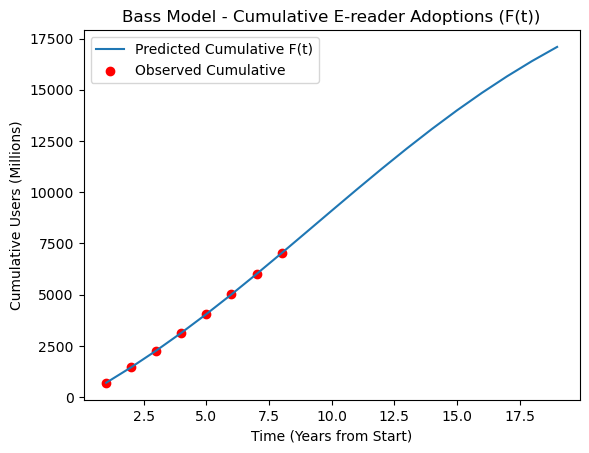

In [62]:
plt.plot(t_future, cumulative_pred, label='Predicted Cumulative F(t)')
plt.scatter(t, cumulative_obs, color='red', label='Observed Cumulative')
plt.title("Bass Model - Cumulative E-reader Adoptions (F(t))")
plt.xlabel("Time (Years from Start)")
plt.ylabel("Cumulative Users (Millions)")
plt.legend()
plt.show()

The Bass Model fits the e-reader adoption data well. Estimated parameters are: 
- p ~ 0.0278 (innovation coefficient)
- q ~ 0.1181 (imitation coefficient)
- M ~ 23055.45 (market potential)

 The innovation coefficient indicates that around 2.8% of potential adopters adopt the product due to external influence, such as marketing, media exposure, or product launches.
This is a moderate p-value, suggesting that while initial adoption is driven by innovators and marketing efforts, it is not exceptionally hig.  
The imitiation coefficient refelcts the strength of the word-of-mouth effect. A q-value around 0.1–0.2 is on the lower end for consumer electronics, implying that adoption spreads somewhat slowly via social influence. In other simpler words, people are less likely to buy e-readers simply because others have them but because of their individual reading habits.  
The maximum number of adopters reflects the saturation point where the market stops growing significantly.
In short, the e-reader market shows a slow, steady adoption pattern primarily drived by the individual need rather than social imitation, with an expected ceiling of ~23 million users globally. 

### References .

Statista. eBook purchases by store brand in the U.S. (2024). Retrieved from [https://www.statista.com/forecasts/997178/ebook-purchases-by-store-brand-in-the-us]  
Statista. Users in the ebooks segment worldwide 2017-2030. Retrieved from [https://www.statista.com/forecasts/1294239/number-of-ebook-users-global]  
Statista. e-readers Statistics report on e-readers. Retrieved from [https://www.statista.com/study/14804/e-readers-statista-dossier/] 
Statista. Amazon - statistics & facts report. Retrieved from [https://www.statista.com/topics/846/amazon/#topicOverview]